<a href="https://www.kaggle.com/code/agnishwarbagchi/waste-classification-cnn-model?scriptVersionId=92141347" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
test_data = r"../input/waste-classification-data/DATASET/TEST/"
train_data = r"../input/waste-classification-data/DATASET/TRAIN/"

labels = ['O','R']

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

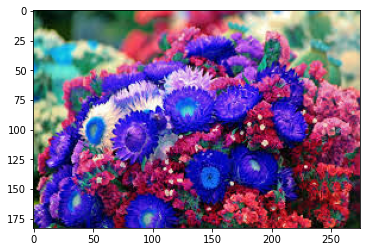

In [4]:
for label in labels:
    path = os.path.join(train_data, label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(183, 275, 3)


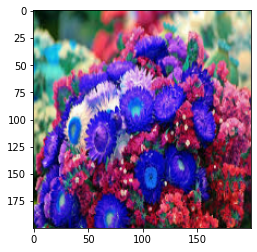

In [6]:
img_size = 200
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(new_array)

In [7]:
def get_data(img_path,data):
    img_size = 200
    for label in labels:
        path = os.path.join(img_path, label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                data.append([new_array, labels.index(label)])
            except:
                pass

            
train = []
test = []

get_data(train_data,train)
get_data(test_data,test)

In [8]:
len(train), len(test)

(22564, 2513)

In [9]:
import random

random.shuffle(train)
random.shuffle(test)

In [10]:
def split_data(data,X,y):
    for i in data:
        X.append(i[0])
        y.append(i[1])
        
X_train = []
y_train = []
X_test = []
y_test = []

split_data(train,X_train,y_train)
split_data(test,X_test,y_test)

In [11]:
X_train = np.array(X_train).reshape(-1,img_size, img_size,3)
y_train = np.array(y_train)

X_test = np.array(X_test).reshape(-1,img_size, img_size,3)
y_test = np.array(y_test)

In [12]:
len(X_train), len(X_test)

(22564, 2513)

(array([12565.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9999.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

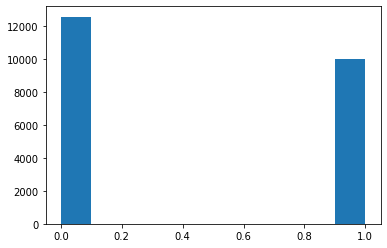

In [13]:
plt.hist(y_train)

(array([1401.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

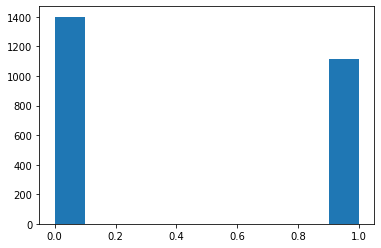

In [14]:
plt.hist(y_test)

In [15]:
X_train.shape

(22564, 200, 200, 3)

In [16]:
from sklearn.model_selection import train_test_split

X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=10)

In [17]:
X_val.shape

(1257, 200, 200, 3)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.layers import Dense, Activation, Flatten

In [19]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(img_size,img_size,3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(150,activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

2022-04-05 06:23:25.904324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 06:23:25.978270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 06:23:25.978990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 06:23:25.980207: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_val,y_val))

2022-04-05 06:23:28.076714: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2707680000 exceeds 10% of free system memory.
2022-04-05 06:23:30.769404: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2707680000 exceeds 10% of free system memory.
2022-04-05 06:23:32.886787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-04-05 06:23:34.224800: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


706/706 [==============================] - 22s 21ms/step - loss: 2.9020 - accuracy: 0.7689 - val_loss: 0.4376 - val_accuracy: 0.8377
Epoch 2/30
706/706 [==============================] - 15s 21ms/step - loss: 0.4162 - accuracy: 0.8227 - val_loss: 0.3112 - val_accuracy: 0.8870
Epoch 3/30
706/706 [==============================] - 14s 20ms/step - loss: 0.3760 - accuracy: 0.8371 - val_loss: 0.3056 - val_accuracy: 0.8791
Epoch 4/30
706/706 [==============================] - 14s 20ms/step - loss: 0.3520 - accuracy: 0.8552 - val_loss: 0.3078 - val_accuracy: 0.8799
Epoch 5/30
706/706 [==============================] - 15s 21ms/step - loss: 0.3333 - accuracy: 0.8652 - val_loss: 0.3226 - val_accuracy: 0.8743
Epoch 6/30
706/706 [==============================] - 14s 20ms/step - loss: 0.2981 - accuracy: 0.8792 - val_loss: 0.3093 - val_accuracy: 0.8679
Epoch 7/30
706/706 [==============================] - 15s 21ms/step - loss: 0.2566 - accuracy: 0.8954 - val_loss: 0.3280 - val_accuracy: 0.8671
Epo

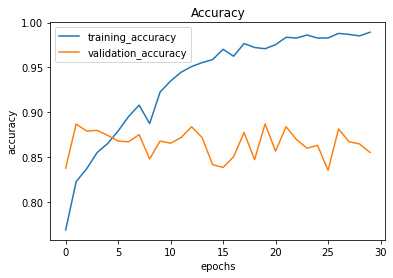

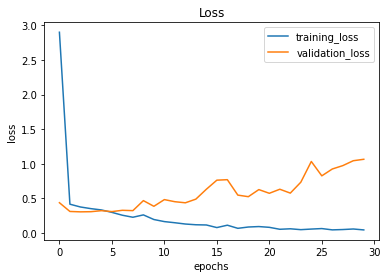

In [21]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test,y_test)

40/40 [==============================] - 0s 9ms/step - loss: 1.1797 - accuracy: 0.8710


[1.1796696186065674, 0.8710191249847412]

In [23]:
predictions = model.predict(X_test)

In [24]:
predictions[:5]

array([[1.5758062e-03],
       [5.4523074e-12],
       [3.9139735e-08],
       [3.2979133e-09],
       [1.3325161e-01]], dtype=float32)

In [25]:
predicted= []

for i in predictions:
    if i >0.5:
        predicted.append(1)
    else:
        predicted.append(0)
predicted[:5]

[0, 0, 0, 0, 0]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(33.0, 0.5, 'Truth')

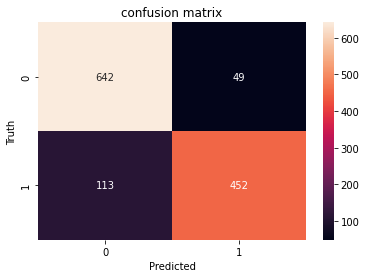

In [30]:
import seaborn as sn

sn.heatmap(cm,annot=True,fmt='d')
plt.title('confusion matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")

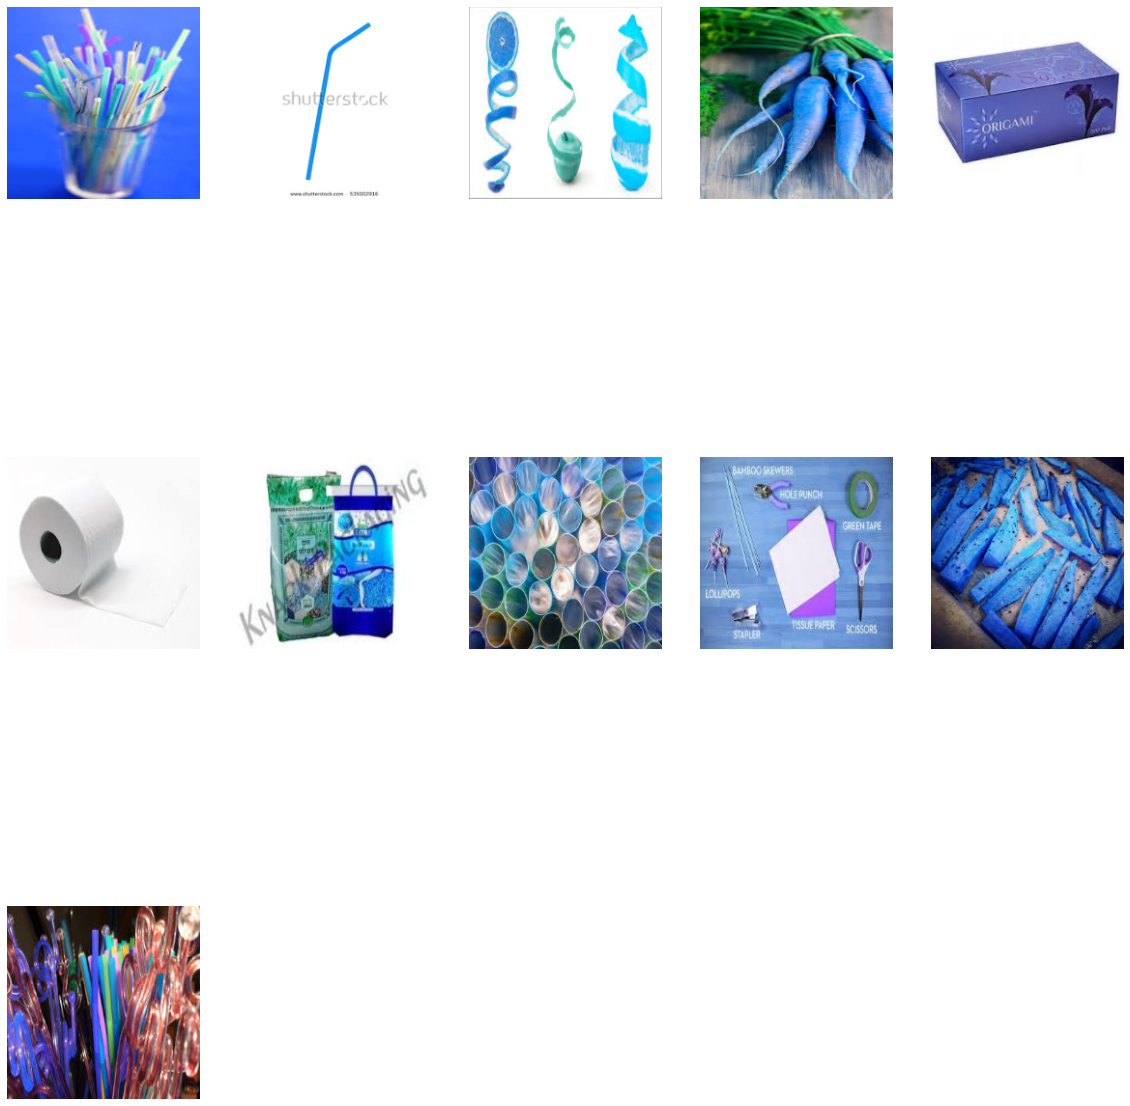

In [40]:
plt.figure(figsize=(20,40))
for i in range(11):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i])
#     plt.xlabel(model.predict(X_test[i]))

In [42]:
y_test[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0])